### 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 경고 보기 싫어서 지워줌
import sys, warnings
if not sys.warnoptions: warnings.simplefilter("ignore")

### 데이터 불러오기

### Task1

In [2]:
# Task1-1 데이터 불러오기
data = pd.read_csv('./owid-covid-data.csv')

In [3]:
# Task1-2 'date'열의 데리터를 날짜 타입으로 변경
data['date'] = pd.to_datetime(data['date']) 
# 확인
print(type(data['date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Task2

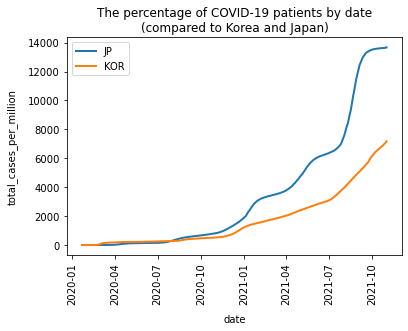

In [4]:
# Task2-1 날짜별 확진자 비율구하기
##한국과 일본으로 데이터 분할
data_kor = data.query('location =="South Korea"')
data_jp = data.query('location =="Japan"')

#일본의 그래프
plt.plot(data_jp['date'],data_jp['total_cases_per_million'],linewidth = 2,label='JP') #plot으로 그림

# 한국의 그래프
plt.plot(data_kor['date'],data_kor['total_cases_per_million'],linewidth = 2,label='KOR') #plot으로 그림

plt.xticks(rotation=90) #x축 값 세로로 변경 
plt.ylabel('total_cases_per_million',labelpad=10) #이름지정
plt.xlabel('date',labelpad=10)
plt.title('The percentage of COVID-19 patients by date\n(compared to Korea and Japan)') #제목
plt.legend(loc="upper left")
plt.show()

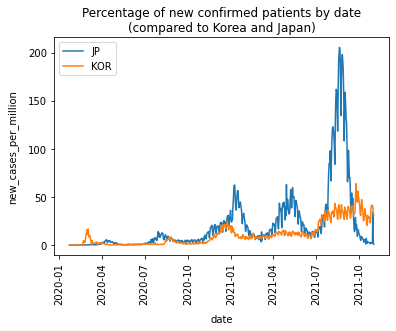

In [5]:
# Task2-2 날짜별 신규 확진자 비율
#일본의 그래프
plt.plot(data_jp['date'],data_jp['new_cases_per_million'],label='JP') #plot으로 그림

# 한국의 그래프
plt.plot(data_kor['date'],data_kor['new_cases_per_million'],label='KOR') #plot으로 그림

plt.xticks(rotation=90) #x축 값 세로로 변경 
plt.ylabel('new_cases_per_million',labelpad=10) #이름지정
plt.xlabel('date',labelpad=10)
plt.title('Percentage of new confirmed patients by date\n(compared to Korea and Japan)') #제목
plt.legend(loc="upper left")
plt.show()

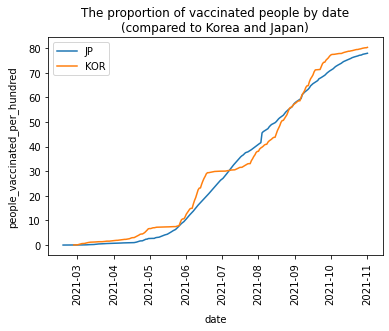

In [6]:
# Task2-3 날짜별 백신 접종자 비율
#일본의 그래프
#na값이 있는 행은 그래프가 끊겨서 그려지기때문에 삭제
plt.plot(data_jp[['date','people_vaccinated_per_hundred']].dropna(axis=0)['date'],
         data_jp[['date','people_vaccinated_per_hundred']].dropna(axis=0)['people_vaccinated_per_hundred'],label='JP') #plot으로 그림

# 한국의 그래프
plt.plot(data_kor['date'],data_kor['people_vaccinated_per_hundred'],label='KOR') #plot으로 그림

plt.xticks(rotation=90) #x축 값 세로로 변경 
plt.ylabel('people_vaccinated_per_hundred',labelpad=10) #이름지정
plt.xlabel('date',labelpad=10)
plt.title('The proportion of vaccinated people by date\n(compared to Korea and Japan)') #제목
plt.legend(loc="upper left")
plt.show()

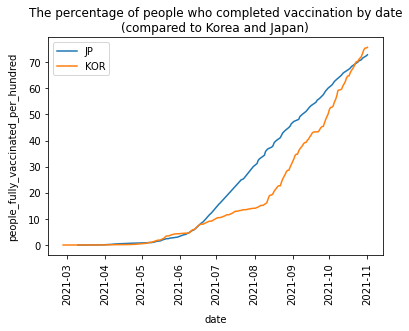

In [7]:
# Task2-4 날짜별 백신 접종 완료자 비율
#일본의 그래프
plt.plot(data_jp[['date','people_fully_vaccinated_per_hundred']].dropna(axis=0)['date'],
         data_jp[['date','people_fully_vaccinated_per_hundred']].dropna(axis=0)['people_fully_vaccinated_per_hundred'],label='JP') #plot으로 그림

# 한국의 그래프
plt.plot(data_kor['date'],data_kor['people_fully_vaccinated_per_hundred'],label='KOR') #plot으로 그림

plt.xticks(rotation=90) #x축 값 세로로 변경 
plt.ylabel('people_fully_vaccinated_per_hundred',labelpad=10) #이름지정
plt.xlabel('date',labelpad=10)
plt.title('The percentage of people who completed vaccination by date\n(compared to Korea and Japan)') #제목
plt.legend(loc="upper left")
plt.show()

### Task3

In [8]:
# Task 3-1 Task 1에서 불러온 데이터에서 다음의 열만 남긴 새로운 데이터프레임 생성하기
data_new = data[['location','date','total_deaths_per_million','total_cases_per_million',
                'people_vaccinated_per_hundred','human_development_index']]

In [9]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127812,ZWE,Africa,Zimbabwe,2021-10-28,132880.0,72.0,48.571,4675.0,0.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127813,ZWE,Africa,Zimbabwe,2021-10-29,132926.0,46.0,48.286,4675.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127814,ZWE,Africa,Zimbabwe,2021-10-30,132926.0,0.0,48.286,4675.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127815,ZWE,Africa,Zimbabwe,2021-10-31,132977.0,51.0,46.571,4678.0,3.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [10]:
#Task 3-2 각 국가별로 가장 최근 날짜의 데이터 추출하기
data_max = data.groupby('location').max().reset_index() # 우선 가장 최근의 날짜를 구해줌

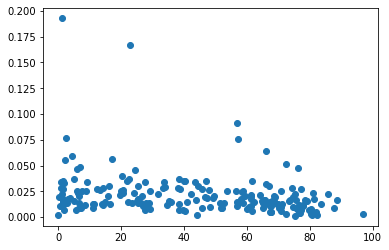

In [11]:
# Task 3-3 백신 접종률을 x축, 확진자 비율 대비 사망자 비율을 y축으로하는 scatter plot 그리기
x = data_max['people_vaccinated_per_hundred'] #가장 최근 날짜가 기준이기 때문에 조건이 붙음
y = data_max['total_deaths_per_million']/data_max['total_cases_per_million']
plt.scatter(x,y)
plt.show()

In [12]:
# Task 3-4 백신 접종률과 확진자 비율 대비 사망자 비율 사이의 상관계수 구하기
#피어슨 상관계수 구하는 함수 구현
def pearson_similarity(u1, u2):
    u1_c = u1 - u1.mean()
    u2_c = u2 - u2.mean()
    denom = np.sqrt(np.sum(u1_c ** 2) * np.sum(u2_c ** 2))
    if denom != 0:
        return np.sum(u1_c * u2_c)/denom
    else:
        return 0
    
pearson_similarity(x,y)

-0.23185178247436014

### Task4

In [13]:
#Task 4-1 Task 3-1에서 생성한 데이터프레임을 활용하여 HDI 계수와 백신 접종률 사이의 상관계수 구하기

pearson_similarity(data_max['human_development_index'],data_max['people_vaccinated_per_hundred'])

0.7250351729877785

In [14]:
import torch

In [15]:
#Task 4-2 Linear Regression 방법으로 HDI 계수와 백신 접종률 사이의 선형 관계 학습하기 (y = wx + b 에서 w값과 b값 구하기)
x_train = torch.FloatTensor([data_max['human_development_index'].fillna(data_max['human_development_index'].mean())]).view([-1, 1])
y_train = torch.FloatTensor([data_max['people_vaccinated_per_hundred'].fillna(data_max['people_vaccinated_per_hundred'].mean())]).view([-1, 1])

In [17]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = torch.optim.Adam([W,b], lr=1.0)

for epoch in range(3001):
    
    hypothesis = x_train * W + b
    
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
        
    if epoch % 100 == 0:
        print( 'epoch: {}, cost: {:.6f}, W: {}, b: {}'.format(epoch,cost.item(), W.squeeze(), b))

epoch: 0, cost: 2900.140625, W: 1.0, b: tensor([1.0000], requires_grad=True)
epoch: 100, cost: 580.080017, W: 33.92451477050781, b: tensor([22.9426], requires_grad=True)
epoch: 200, cost: 531.915344, W: 46.491455078125, b: tensor([13.9057], requires_grad=True)
epoch: 300, cost: 483.220825, W: 60.91602325439453, b: tensor([3.3405], requires_grad=True)
epoch: 400, cost: 441.226105, W: 75.66163635253906, b: tensor([-7.4606], requires_grad=True)
epoch: 500, cost: 408.665710, W: 89.66190338134766, b: tensor([-17.7153], requires_grad=True)
epoch: 600, cost: 385.492554, W: 102.24382781982422, b: tensor([-26.9309], requires_grad=True)
epoch: 700, cost: 370.203674, W: 113.0446548461914, b: tensor([-34.8419], requires_grad=True)
epoch: 800, cost: 360.805603, W: 121.94420623779297, b: tensor([-41.3601], requires_grad=True)
epoch: 900, cost: 355.410065, W: 129.00143432617188, b: tensor([-46.5290], requires_grad=True)
epoch: 1000, cost: 352.514191, W: 134.3948974609375, b: tensor([-50.4793], requir

In [18]:
print(W, b)

tensor([146.3494], requires_grad=True) tensor([-59.2351], requires_grad=True)


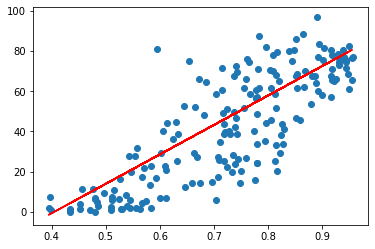

In [19]:
#Task 4-3 HDI 계수를 x축으로, 백신 접종률을 y축으로하는 scatter plot과, Task 4-2에서 학습한 직선을 겹쳐 그리기 
#(scatter plot과 직선이 일치하는지 확인하여 학습이 제대로 되었는지확인)

plt.scatter(data_max['human_development_index'], data_max['people_vaccinated_per_hundred'])
plt.plot(data_max['human_development_index'],data_max['human_development_index']*float(W) + float(b),c='r')
plt.show()

## END